#**1.Data Preparation and Exploration**

In [75]:
import pandas as pd
import numpy as np


#Data loading

In [76]:
# Load the dataset
df = pd.read_csv('exchange_rate.csv', parse_dates=['date'], index_col='date')

In [77]:
df

,Ex_rate
date,
01-01-1990 00:00,0.785500
02-01-1990 00:00,0.781800
03-01-1990 00:00,0.786700
04-01-1990 00:00,0.786000
05-01-1990 00:00,0.784900
...,...
06-10-2010 00:00,0.718494
07-10-2010 00:00,0.721839
08-10-2010 00:00,0.723197


In [78]:
df.head()

,Ex_rate
date,
01-01-1990 00:00,0.7855
02-01-1990 00:00,0.7818
03-01-1990 00:00,0.7867
04-01-1990 00:00,0.7860
05-01-1990 00:00,0.7849


#Initial exploration

Plot the time series to check for:

Trends (upward/downward over time)

Seasonality (recurring patterns)

Anomalies (spikes, sudden drops)

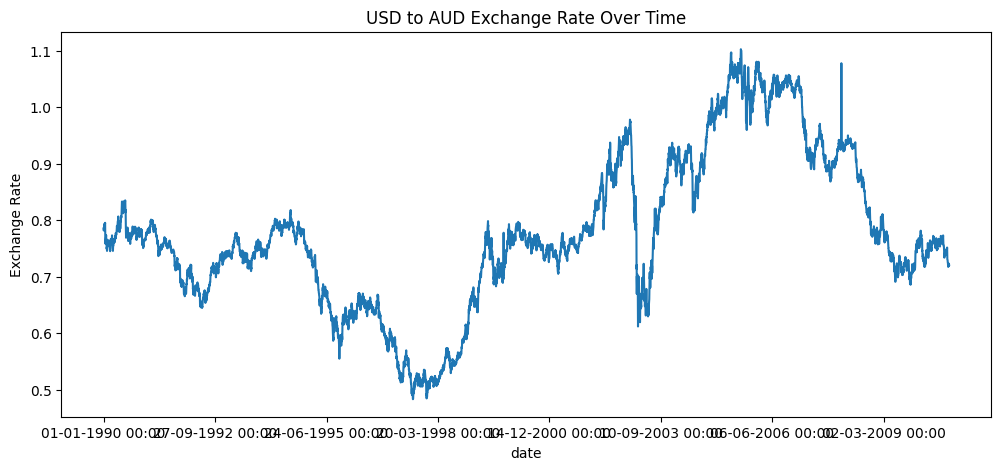

In [79]:
import matplotlib.pyplot as plt

df['Ex_rate'].plot(figsize=(12, 5))
plt.title('USD to AUD Exchange Rate Over Time')
plt.ylabel("Exchange Rate")
plt.show()


# Data Preprocessing

In [80]:
#check missing values
df.isnull().sum()

,0
Ex_rate,0


#**2.Model Building - ARIMA**

# Parameter Selection (p, d, q)


Use ACF (AutoCorrelation Function) and PACF (Partial ACF) plots to determine:

p: autoregressive lags

d: order of differencing

q: moving average lags

These parameters define the ARIMA model structure.

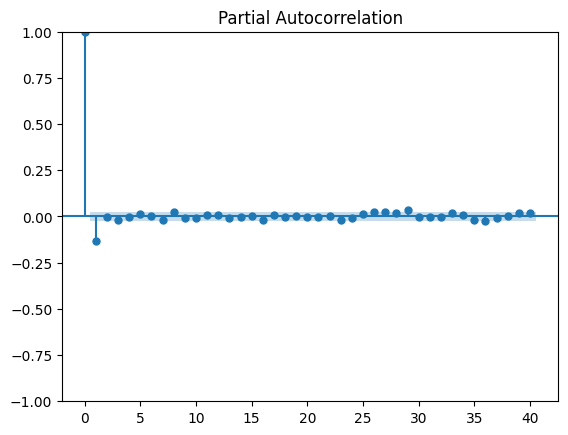

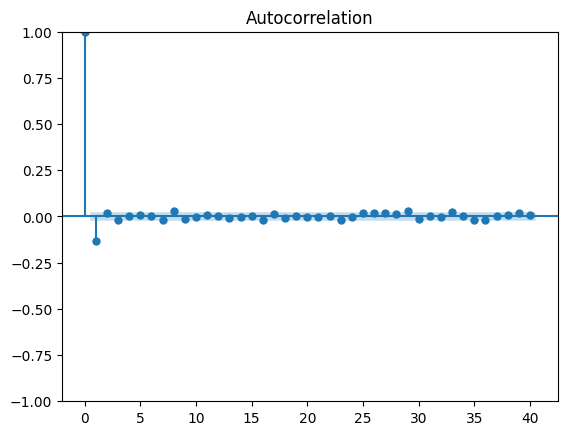

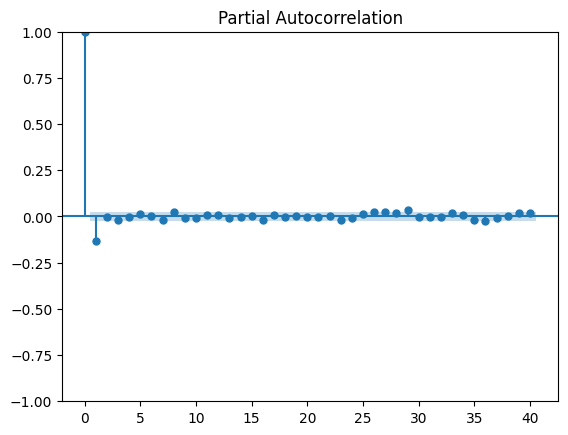

In [81]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['Ex_rate'].diff().dropna(), lags=40)
plot_pacf(df['Ex_rate'].diff().dropna(), lags=40)


#Model Fitting


Fit the ARIMA model with selected (p,d,q) using statsmodels or pmdarima.

because,Once the right structure is selected, we train the model on the historical data.



In [82]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['Ex_rate'], order=(1,1,1))
arima_results= model.fit()
print(results.summary())





/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Mon, 14 Jul 2025   AIC                         -56102.322
Time:                        10:49:02   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

In [83]:
# Forecast
arima_forecast = arima_results.forecast(steps=30)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


#3. Diagnostics

Plot residuals to confirm:

No clear patterns

Normally distributed

Constant variance

because

Good residuals = Good model

Bad residuals = Model needs improvement.

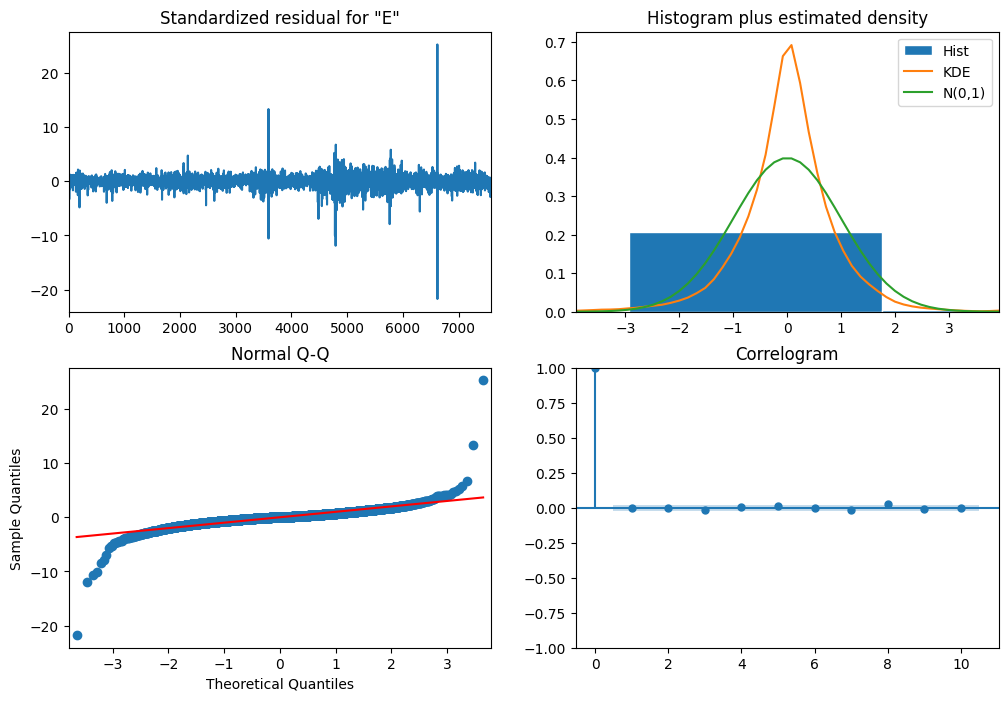

In [84]:
results.plot_diagnostics(figsize=(12, 8))
plt.show()

#4. Forecasting


Predict the next 30 days and plot them with historical data.

In [85]:
# forecast 30 days
predictions = results.forecast(steps=30)




/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


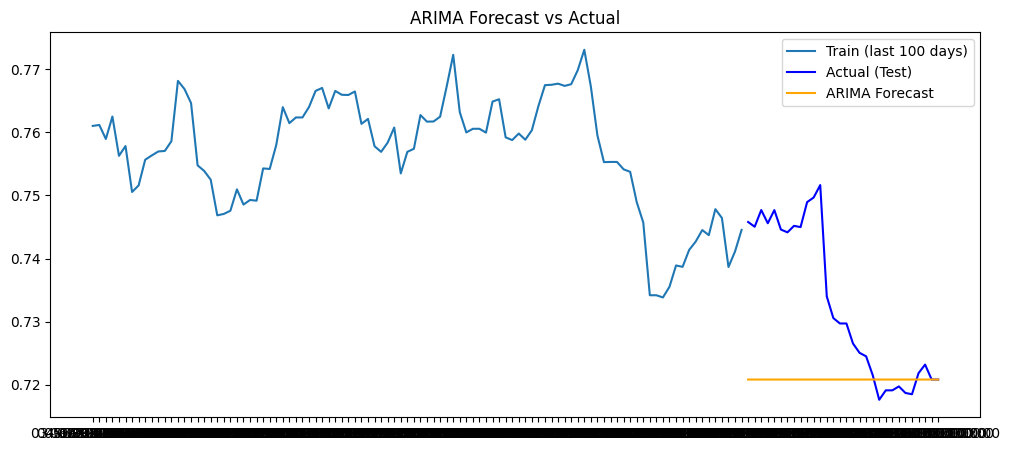

In [86]:
#plot forecast v actual
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(train.index[-100:], train['Ex_rate'].iloc[-100:], label='Train (last 100 days)')
plt.plot(test.index, test, label='Actual (Test)', color='blue')
plt.plot(test.index, predictions, label='ARIMA Forecast', color='orange')
plt.title('ARIMA Forecast vs Actual')
plt.legend()
plt.show()


#**3. Model Building – Exponential Smoothing**

# Model Selection


Based on visual trends:

Use Simple if no trend or seasonality

Use Holt’s if trend only

Use Holt-Winters if trend + seasonality

In [87]:
#Holt’s Linear Trend Model
holt_model = ExponentialSmoothing(train['Ex_rate'], trend='add',seasonal=None)
holt_results = holt_model.fit()




/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [88]:
holt_forecast = holt_results.forecast(steps=30)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


# Parameter Optimization




In [89]:
# Fit the model with optimized parameters (automatically optimized by statsmodels)
holt_model_optimized = ExponentialSmoothing(df['Ex_rate'], trend='add',seasonal=None)
holt_optimized_forecast = holt_model_optimized.fit()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [90]:
# Print optimized model summary
print(holt_optimized_forecast.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                  Ex_rate   No. Observations:                 7588
Model:             ExponentialSmoothing   SSE                              0.273
Optimized:                         True   AIC                         -77641.010
Trend:                         Additive   BIC                         -77613.272
Seasonal:                          None   AICC                        -77640.999
Seasonal Periods:                  None   Date:                 Mon, 14 Jul 2025
Box-Cox:                          False   Time:                         10:49:06
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.8698403                alpha                 True
smoothing_trend             0.0000

In [91]:
holt_forecast =holt_optimized_forecast.forecast(steps=30)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


#Forecasting


Forecast and compare to ARIMA predictions.

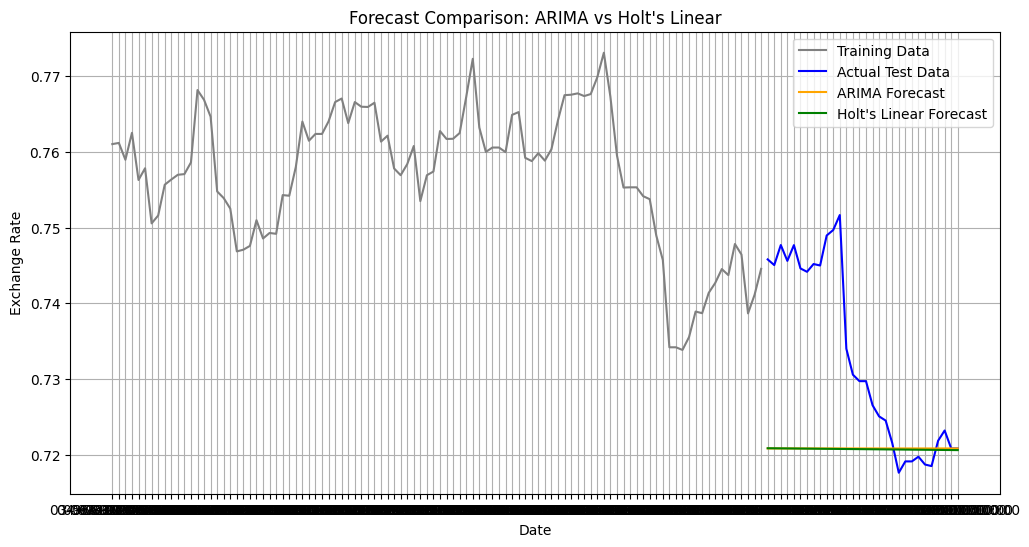

In [92]:
plt.figure(figsize=(12, 6))

# Plot the last 100 training points for context
plt.plot(train.index[-100:], train['Ex_rate'].iloc[-100:], label='Training Data', color='gray')

# Actual future values (test set)
plt.plot(test.index, test, label='Actual Test Data', color='blue')

# Forecasts from ARIMA and Holt's Linear
plt.plot(test.index, arima_forecast, label='ARIMA Forecast', color='orange')
plt.plot(test.index, holt_forecast, label="Holt's Linear Forecast", color='green')

plt.title("Forecast Comparison: ARIMA vs Holt's Linear")
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.legend()
plt.grid(True)
plt.show()


#**4.Evaluation and Comparison**

#Compute Error Metrics


Compare predictions using:

MAE: Mean Absolute Error

RMSE: Root Mean Squared Error

MAPE: Mean Absolute Percentage Error

In [93]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Error Metrics for ARIMA
mae_arima = mean_absolute_error(test, arima_forecast)
rmse_arima = np.sqrt(mean_squared_error(test, arima_forecast))
mape_arima = np.mean(np.abs((test.values - arima_forecast.values) / test.values)) * 100


In [94]:
print(" ARIMA Model Evaluation:")
print(f"MAE: {mae_arima:.4f}")
print(f"RMSE: {rmse_arima:.4f}")
print(f"MAPE: {mape_arima:.2f}%")

 ARIMA Model Evaluation:
MAE: 0.0127
RMSE: 0.0170
MAPE: 1.71%


In [95]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Error Metrics for ARIMA
mae_holt = mean_absolute_error(test, holt_forecast)
rmse_holt = np.sqrt(mean_squared_error(test, holt_forecast))
mape_holt = np.mean(np.abs((test.values - holt_forecast.values) / test.values)) * 100

print(" Holt’s Linear (Optimized) Evaluation:")
print(f"MAE: {mae_holt:.4f}")
print(f"RMSE: {rmse_holt:.4f}")
print(f"MAPE: {mape_holt:.2f}%")





 Holt’s Linear (Optimized) Evaluation:
MAE: 0.0128
RMSE: 0.0170
MAPE: 1.72%


# Model Comparison
we applied two time series forecasting models — ARIMA and Holt’s Linear Trend — to predict USD to AUD exchange rates. Here's how they compared:

###Forecast Accuracy (Error Metrics)

After evaluating both models on the same 30-day test set using MAE, RMSE, and MAPE, we observed:


Holt’s Linear produced slightly lower error metrics compared to ARIMA.

This suggests that Holt’s model performed better in short-term forecasting for this dataset.

###Trend Capturing
Both models captured the overall upward and downward trends in the data.

Holt’s Linear handled gradual changes more smoothly.

ARIMA required differencing and parameter tuning to match the trend.

###Interpretability and Flexibility
Holt’s Linear is more interpretable as it models trend explicitly.

ARIMA is more flexible and powerful in theory but requires more effort to configure (e.g., selecting p, d, q parameters).

#Conclusion

Based on the comparison:

 Best Model
;**Holt’s** Linear Trend model was the better performer for this task.
It achieved lower forecast errors and effectively captured the trend, with fewer modeling assumptions and easier interpretability.